<h1 align='center'> CS353 Machine Learning Lab</h1>
<h1 align='center'>Lab-2 (19/03/21)</h1>
<h2 align='center'>Shumbul Arifa (181CO152)</h2>

# Task:
Perform logistic regression on a sample dataset.

## Dataset

`Wine`

The wine dataset is a classic and very easy multi-class classication dataset avilable in sklearn standard library.

# Importing Libraries

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline

# Loading dataset

In [19]:
dataset = load_wine()
X, y = load_wine(return_X_y=True)

In [20]:
print("Features of first five values are: ")
print(X[0:5])
print("Classes of first five values are: ", y[0:5])

Features of first five values are: 
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
Classes of first five values are:  [0 0 0 0 0]


In [21]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['Target'] = dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [23]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [24]:
print("Dataset shape: ", df.shape)
print("Target classes: ", pd.unique(df['Target']))
print("Number of target classes: ", len(pd.unique(df['Target'])))
print("\n\n")
df.info()

Dataset shape:  (178, 14)
Target classes:  [0 1 2]
Number of target classes:  3



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-nu

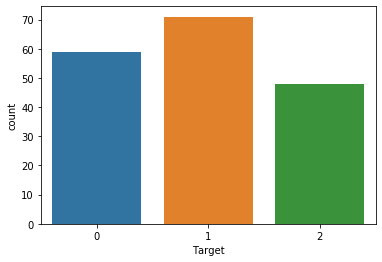

In [25]:
# printing label's plot
import seaborn as sns
sns.countplot(x="Target", data=df)

# Splitting Data

We are using X-y split method with test size 20 % and random state 5.

In [26]:
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Implementing Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/home/shumbul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
log_reg.coef_

array([[-1.14459351e-01,  5.36838655e-02,  1.15923962e-01,
        -1.92026891e-01, -2.55766412e-02,  7.21772825e-02,
         3.47187510e-01, -1.87830187e-02,  8.46976656e-02,
        -4.28877695e-02, -1.01476803e-02,  2.22820710e-01,
         8.98308416e-03],
       [ 5.14084767e-01, -5.74794189e-01, -1.46149756e-01,
         1.49735020e-01,  3.25205654e-03,  3.65897542e-01,
         4.66051253e-01,  1.41354451e-02,  2.60985828e-01,
        -1.13051830e+00,  2.21753149e-01,  4.56981289e-01,
        -8.83814007e-03],
       [-3.99625417e-01,  5.21110324e-01,  3.02257937e-02,
         4.22918716e-02,  2.23245846e-02, -4.38074825e-01,
        -8.13238764e-01,  4.64757359e-03, -3.45683494e-01,
         1.17340607e+00, -2.11605468e-01, -6.79801999e-01,
        -1.44944096e-04]])

In [30]:
log_reg.intercept_

array([-0.03548303,  0.08491677, -0.04943373])

In [31]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1])

In [32]:
y_pred.shape

(36,)

# Analysis

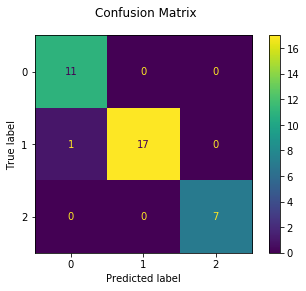

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(log_reg, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy of the classifier: ", accuracy_score(y_test, y_pred))
print("Percentage Accuracy of Classifier: {0:0.4f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the classifier:  0.9722222222222222
Percentage Accuracy of Classifier: 97.2222%
